In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
df = pd.read_csv('/Users/aditirajesh/Desktop/program_files/python/python_7sem/DL_lab/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

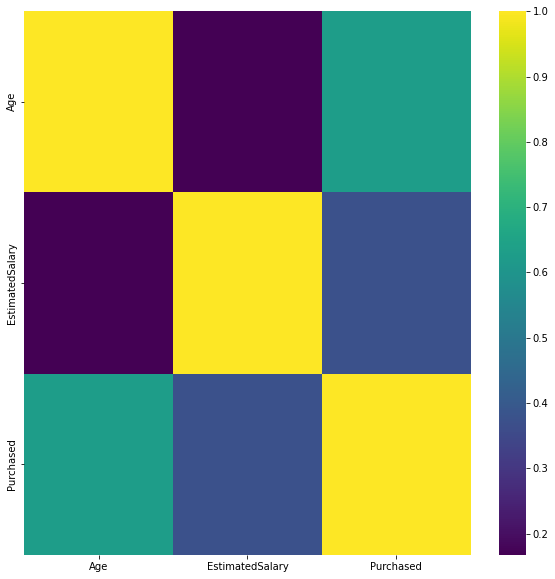

In [7]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis')
plt.show()

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
model = SVC(kernel='rbf',random_state=0)
model.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [12]:
model.predict(X_test_scaled)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1])

In [13]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
#visualization of training set 
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test_scaled), y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-10, stop=X_set[:,0].max()+10,step=0.25),
                    np.arange(start=X_set[:,1].min()-1000, stop=X_set[:,1].max()+1000, step=0.25))

plt.contourf(X1,X2,model.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()